# MODULO 3 Evaluacion Final

# FASE 1. Exploracion y Limpieza

### Carga de Librerias y Datasets

### Importar las librerías y cargar los archivos CSV para comenzar el análisis.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualización
%matplotlib inline
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

# Carga de archivos
df_flights = pd.read_csv('Customer Flight Activity.csv')
df_loyalty = pd.read_csv('Customer Loyalty History.csv')

print("Datasets cargados correctamente.")

Datasets cargados correctamente.


## 1.1 Exploracion Inicial 

### Primera inspección para conocer las dimensiones de los datos y los tipos de variables.

In [53]:
# Dimensiones y vista previa
print(f"Dimensiones Vuelos: {df_flights.shape}")
print(f"Dimensiones Historial: {df_loyalty.shape}")

display(df_flights.head())
display(df_loyalty.head())

Dimensiones Vuelos: (405624, 10)
Dimensiones Historial: (16737, 16)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [59]:
# Info de tipos de datos
print("\n--- INFO VUELOS ---\n")
df_flights.info()
print("\n------\n")
print("\n--- INFO HISTORIAL ---\n")
df_loyalty.info()


--- INFO VUELOS ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB

------


--- INFO HISTORIAL ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 1673

Observamos que el dataset de actividad de vuelos tiene más de 400.000 registros, mientras que el historial tiene unos 16.700 clientes únicos. 

### Obtener estadisticas descriptivas para identificar valores atípicos o errores en los datos numéricos y categóricos.

In [61]:
# Estadísticas para variables numéricas vuelos y historial
print("Estadísticas Numéricas (Vuelos):")
display(df_flights.describe().T)

print("\nEstadísticas Numéricas (Historial):")
display(df_loyalty.describe().T)

Estadísticas Numéricas (Vuelos):


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0



Estadísticas Numéricas (Historial):


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


Podemos ver que en Salary, el valor minimo es negativo. Primer error que hay que investigar y arreglar.

CLV, al valor maximo es muy superior a la media (83, frente a un 8) Lo que puede indicar que hay pocos clientes estrella o algun error.

In [62]:
# Estadísticas para variables categóricas 
print("\nEstadísticas Categóricas (Historial):")
display(df_loyalty.describe(include='object').T)


Estadísticas Categóricas (Historial):


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


Country es una columna inutil y podriamos prescindir de ella ya que el valor es siempre Canada y no aporta informacion extra.

In [45]:
# Análisis de Nulos inicial
print("\nNulos en Flight Activity:\n", df_flights.isnull().sum())
print("\nNulos en Loyalty History:\n", df_loyalty.isnull().sum())


Nulos en Flight Activity:
 Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

Nulos en Loyalty History:
 Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64


El porcentaje de nulos en salary es tan alto que  si los eliminaramos, perderiamos demasiada informacion. Asi que hay que rellenar con la madiana o con la media.

Los nulos en Fechas de cancelacion es altisimo, lo cual es bueno ya que significa que la mayoria de los clientes siguen activos.

In [ ]:
# Ver cuantos valores unicos hay por columna
print("Valores únicos por columna:")
print(df_merged.nunique())

Valores únicos por columna:
Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
Country                            1
Province                          11
City                              29
Postal Code                       55
Gender                             2
Education                          5
Salary                          5890
Marital Status                     3
Loyalty Card                       3
CLV                             7984
Enrollment Type                    2
Enrollment Year                    7
Enrollment Month                  12
Cancellation Year                  6
Cancellation Month                12
dtype: int64


Tenemos 16737 clientes :d y los mantenemos

### Informacion mas extensa de Nulos y Duplicados

In [65]:
# Comprobación de nulos
print("Nulos en Actividad de Vuelos:\n", df_flights.isnull().sum())
print("\nNulos en Historial de Lealtad:\n", df_loyalty.isnull().sum())

Nulos en Actividad de Vuelos:
 Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

Nulos en Historial de Lealtad:
 Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64


In [66]:
# Comprobación de duplicados
print(f"\nFilas duplicadas en Vuelos: {df_flights.duplicated().sum()}")
print(f"Filas duplicadas en Historial: {df_loyalty.duplicated().sum()}")


Filas duplicadas en Vuelos: 1864
Filas duplicadas en Historial: 0


### Union de .csv (Unir ambos datasets de la forma más eficiente utilizando la columna común Loyalty Number)

In [68]:
# Unimos usando un 'left join' 
df_merged = df_flights.merge(
    df_loyalty, 
    on='Loyalty Number', 
    how='left')

print(f"Dataset unido. Dimensiones: {df_merged.shape}")
df_merged.head()

Dataset unido. Dimensiones: (405624, 25)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


Como la columna "Loyalty Number" actua como Primary Key y Foreign key, esto permite relaccionar ambos datasets con esa columna.

Hice un merge left usando df_flight como tabla principal ya que un cliente puede tener varias filas si ha volado en varios meses asi que la relacion es uno a varios. 

Con este se eliminan los duplicados. 
El dataset combinado tiene 405624 filas y 25 columnas.

### Limpiar los nombres de las columnas para facilitar el manejo del codigo y documentar errores encontrados (como salarios negativos).

In [70]:
# 1. Convertir nombres de columnas a minúsculas y quitar espacios
df_merged.columns = [col.lower().replace(" ", "_") for col in df_merged.columns]

In [71]:
# 2. Verificar el error detectado en el paso 3 (salarios negativos)
salarios_erroneos = df_merged[df_merged['salary'] < 0]
print(f"Cantidad de registros con salario negativo: {len(salarios_erroneos)}")

Cantidad de registros con salario negativo: 480


In [72]:
# 3. Mostrar las nuevas columnas
print("\nColumnas listas para trabajar:")
print(df_merged.columns.tolist())


Columnas listas para trabajar:
['loyalty_number', 'year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed', 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month']


-------------------------------------------------

## 1.2. Limpieza de Datos

### Eliminar filas idénticas para evitar sesgos en el análisis estadístico.

In [74]:
# Eliminamos duplicados en la tabla de vuelos antes de trabajar con el conjunto unido
df_flights.drop_duplicates(inplace=True)

# Re-generamos el merge para trabajar con datos limpios desde el inicio
df_merged = df_flights.merge(df_loyalty, on='Loyalty Number', how='left')
df_merged.columns = [col.lower().replace(" ", "_") for col in df_merged.columns]

print(f"Dataset sin duplicados listo. Filas totales: {len(df_merged)}")

Dataset sin duplicados listo. Filas totales: 403760


### Corrección de valores erroneos en Salarios

In [76]:
# Primero, convertimos los valores negativos en NaN (nulos) para que puedan ser imputados
df_merged.loc[df_merged['salary'] < 0, 'salary'] = np.nan

# Calculamos la mediana, usamos la global para simplificar 
mediana_salary = df_merged['salary'].median()

# Sustituimos esos nuevos nulos por la mediana
df_merged['salary'] = df_merged['salary'].fillna(mediana_salary)

# Verificamos que ya no existan negativos ni nulos en la columna salary
print(f"Registros con salario negativo tras la corrección: {len(df_merged[df_merged['salary'] < 0])}")
print(f"Registros con salario nulo tras la corrección: {df_merged['salary'].isnull().sum()}")

Registros con salario negativo tras la corrección: 0
Registros con salario nulo tras la corrección: 0


### Tratamiento de valores nulos en columnas de cancelacion

In [81]:
# Los nulos significan que el cliente está ACTIVO. Rellenamos con 0 para poder convertir la columna a números enteros.
df_merged['cancellation_year'] = df_merged['cancellation_year'].fillna(0)
df_merged['cancellation_month'] = df_merged['cancellation_month'].fillna(0)

print("Nulos después de la correccion en Salarios y Cancelaciones:")
print(df_merged[['salary', 'cancellation_year', 'cancellation_month']].isnull().sum())

Nulos después de la correccion en Salarios y Cancelaciones:
salary                0
cancellation_year     0
cancellation_month    0
dtype: int64


### Ajustar tipos de datos para consistencia. Convertir columnas a los tipos de datos adecuados para garantizar la coherencia

In [82]:
# Convertir años y meses de cancelacion a enteros (ya que no tienen nulos ahora)
df_merged['cancellation_year'] = df_merged['cancellation_year'].astype(int)
df_merged['cancellation_month'] = df_merged['cancellation_month'].astype(int)

# Asegurar que las columnas de puntos sean numericas
df_merged['points_accumulated'] = pd.to_numeric(df_merged['points_accumulated'], errors='coerce')

# Verificación final de tipos
print("--- Tipos de datos finales ---")
print(df_merged.dtypes)

--- Tipos de datos finales ---
loyalty_number                   int64
year                             int64
month                            int64
flights_booked                   int64
flights_with_companions          int64
total_flights                    int64
distance                         int64
points_accumulated             float64
points_redeemed                  int64
dollar_cost_points_redeemed      int64
country                         object
province                        object
city                            object
postal_code                     object
gender                          object
education                       object
salary                         float64
marital_status                  object
loyalty_card                    object
clv                            float64
enrollment_type                 object
enrollment_year                  int64
enrollment_month                 int64
cancellation_year                int64
cancellation_month               

Se eliminaron 1,864 filas repetidas en la actividad de vuelos para no duplicar el conteo de viajes por mes.

Se corrigieron los valores negativos en Salarios convirtiéndolos con la media.

Las fechas de cancelación tenían nulos porque la mayoría de clientes están activos. Se sustituyeron por 0 para transformar la columna de float a int, facilitando otros analisis posteriores.

Se mantuvieron todos los nombres de columnas en minúsculas y sin espacios para mejorar la eficiencia al escribir código.

----------------------------------------------------

# FASE 2. Analisis Estadistico

## 2.1 Análisis de Variables Numéricas

### A. Calcular estadisticas descriptivas, identificar valores raros y analizar la correlacion entre las variables clave.

In [85]:
# Definimos las variables numéricas de interés
num_cols = ['flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'salary', 'clv']


stats_desc = df_merged[num_cols].describe().T
stats_desc['mode'] = df_merged[num_cols].mode().iloc[0] # Añadimos la moda
display(stats_desc)


,count,mean,std,min,25%,50%,75%,max,mode
flights_booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00,0.00
flights_with_companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00,0.00
total_flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00,0.00
distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00,0.00
points_accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50,0.00
salary,403760.0,77935.585818,30076.052460,15609.00,64001.00,73523.00,82940.00,407228.00,73523.00
clv,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.34,8937.12,83325.38,8564.77


La media de vuelos reservados es de aproximadamente 4.13, pero la moda es 0. Esto nos indica que en muchos meses los clientes no realizan viajes, lo cual es normal en la industria aérea (no todo el mundo vuela todos los meses).

El salario medio ronda los 77,935, lo que sugiere un perfil de cliente de clase media-alta.

El Valor de Vida del Cliente promedio es de 7,990, con una desviación estándar alta, indicando que hay clientes mucho más valiosos que otros.

### B. Identificación de valores atípicos en variables numericas

Visualizar la dispersión de los datos para detectar valores que se alejan significativamente de la norma

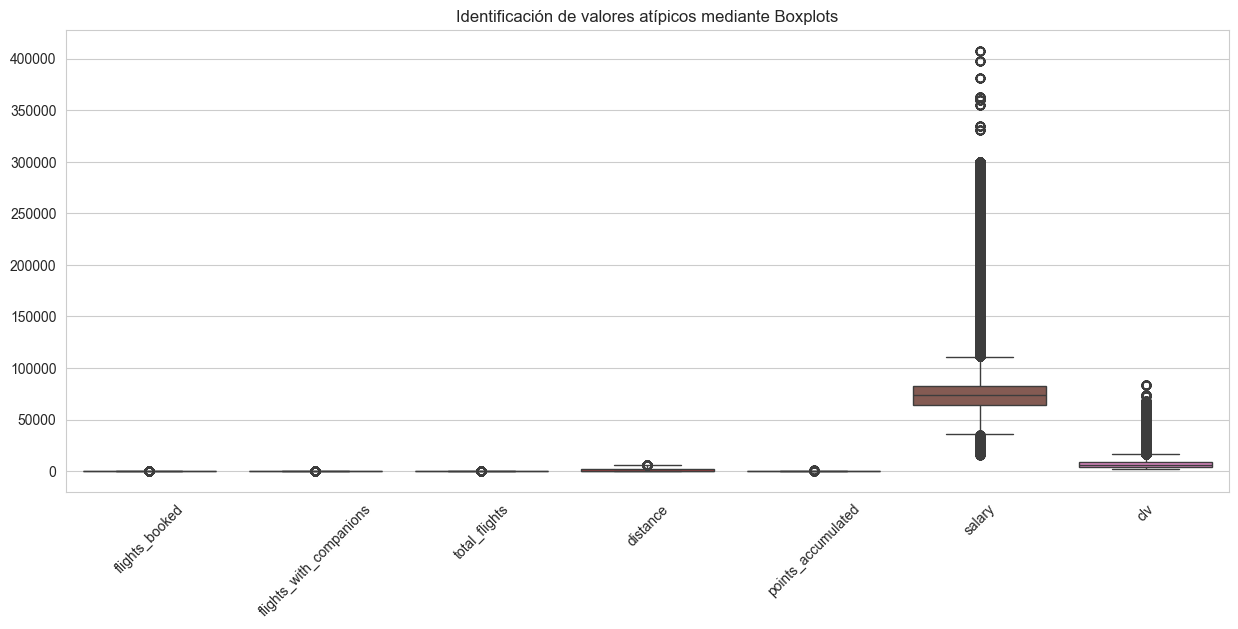

In [87]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_merged[num_cols])
plt.xticks(rotation=45)
plt.title('Identificación de valores atípicos mediante Boxplots')
plt.show()

Salario y CLV son las columnas con más valores atípicos. Tenemos algunos clientes con salarios superiores a 400,000 y CLV de 80,000.

Estos "valores atípicos" no son necesariamente errores, representan a nuestro segmento Premium. Son clientes VIP que viajan mucho más que el resto y generan la mayor parte de los ingresos.

### C. Análisis de Correlación

Estudiar la relación entre las variables numéricas para ver cómo influye una sobre otra.

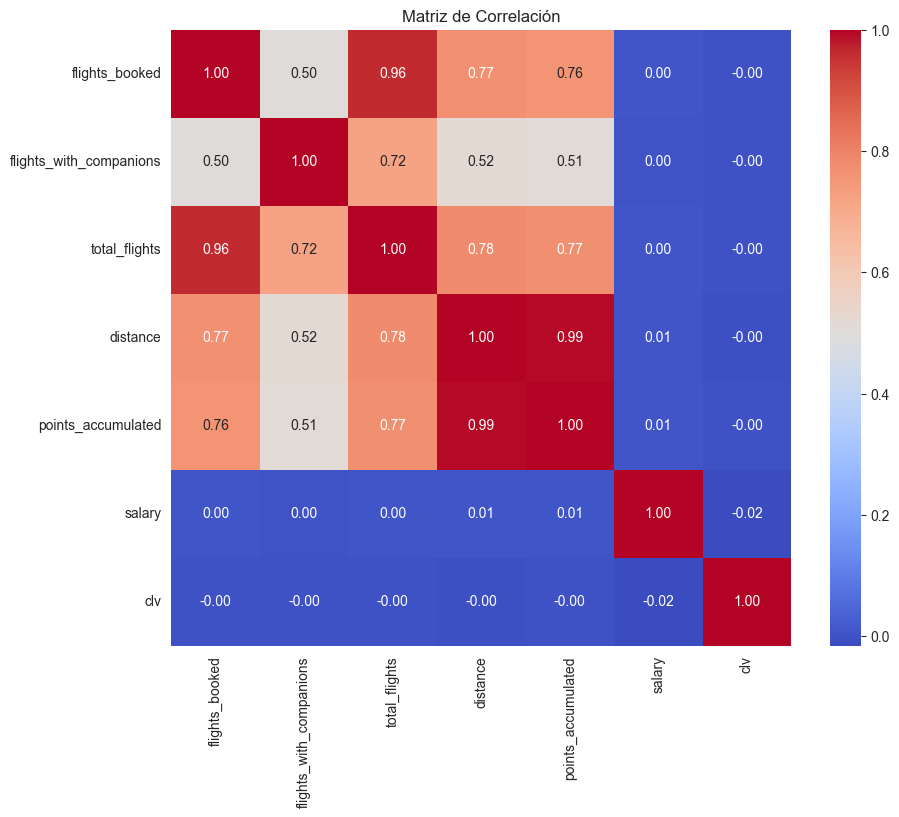

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_merged[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Relación Fuerte (0.99). Existe una correlación casi perfecta entre distance y points_accumulated. Esto confirma que el sistema de puntos es estrictamente proporcional a los kilómetros volados.

Relación Inexistente. Curiosamente, el salario no tiene correlación con el número de vuelos reservados (casi 0). Esto sugiere que la gente vuela por necesidad o habito, y no necesariamente porque gane más dinero.

## 2.2 Análisis de Variables Categóricas

### Base de clientes según género, nivel educativo, estado civil y tipo de tarjeta para identificar los segmentos principales

#### Distribución por Género

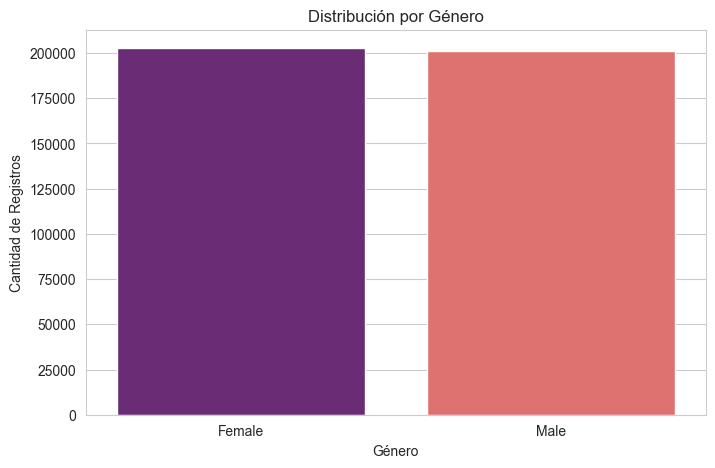

In [91]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_merged, x='gender', hue='gender', palette='magma', legend=False)
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Registros')
plt.show()

La base de datos está equilibrada casi al 50% entre hombres y mujeres, lo que indica que el programa de lealtad no tiene un sesgo de género.

#### Distribución por Nivel Educativo

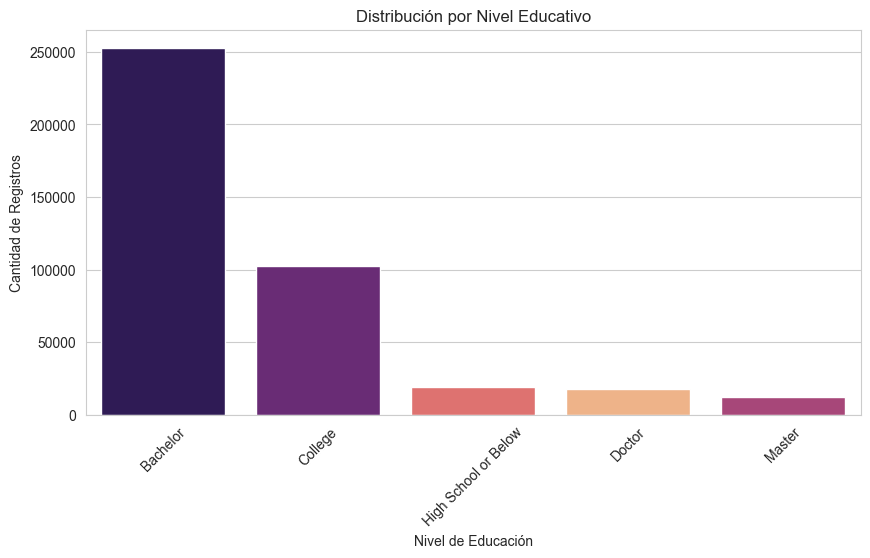

In [92]:
plt.figure(figsize=(10, 5))
# Ordenamos de mayor a menor para que sea más profesional
order_edu = df_merged['education'].value_counts().index

sns.countplot(data=df_merged, x='education', hue='education', palette='magma', order=order_edu, legend=False)
plt.title('Distribución por Nivel Educativo')
plt.xlabel('Nivel de Educación')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45)
plt.show()

El grupo más grande es "Bachelor", seguido por "College". Los clientes con estudios de master o doctorado son una minoría, lo que sugiere que el perfil principal es de profesionales universitarios.

#### Distribución por Estado Civil

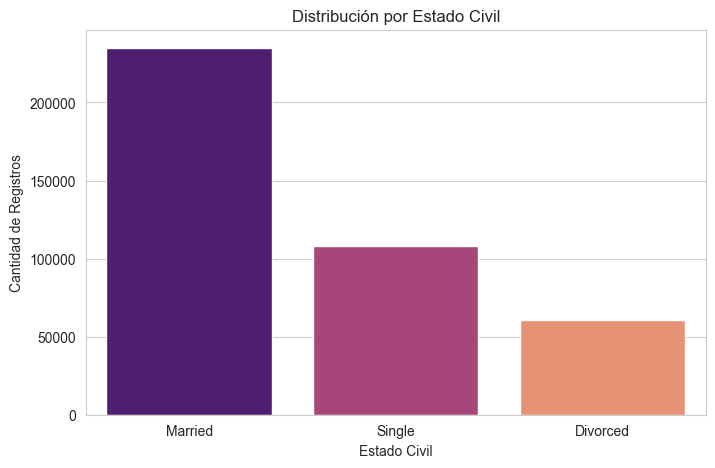

In [93]:
plt.figure(figsize=(8, 5))
order_marital = df_merged['marital_status'].value_counts().index

sns.countplot(data=df_merged, x='marital_status', hue='marital_status', palette='magma', order=order_marital, legend=False)
plt.title('Distribución por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Registros')
plt.show()

La mayoría de los clientes están casados. Este dato es clave para el negocio, ya que explica por qué existe un volumen alto de "vuelos con acompañantes".

#### Distribución por Tipo de Tarjeta de Lealtad

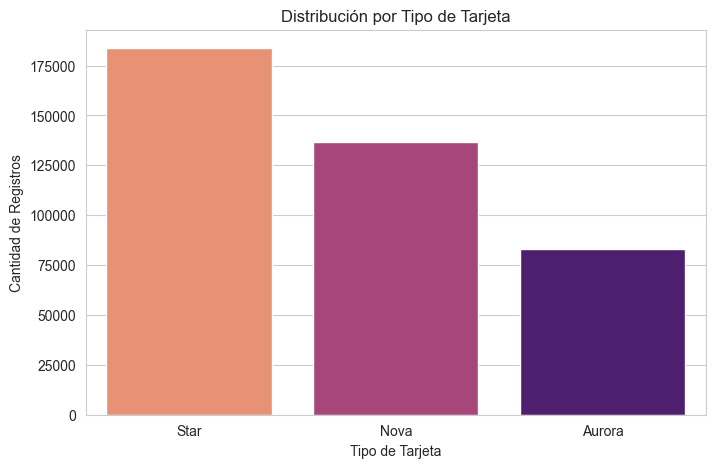

In [94]:
plt.figure(figsize=(8, 5))
order_card = df_merged['loyalty_card'].value_counts().index

sns.countplot(data=df_merged, x='loyalty_card', hue='loyalty_card', palette='magma', order=order_card, legend=False)
plt.title('Distribución por Tipo de Tarjeta')
plt.xlabel('Tipo de Tarjeta')
plt.ylabel('Cantidad de Registros')
plt.show()

La tarjeta "Star" es la más común (el nivel de entrada), mientras que la "Aurora" es la más exclusiva. Hay una buena base de clientes en niveles intermedios (Nova), lo que indica progresión en el programa.

--------------------------------------------------

# FASE 3. Visualizacion

Distribucion de vuelos reservados por mes

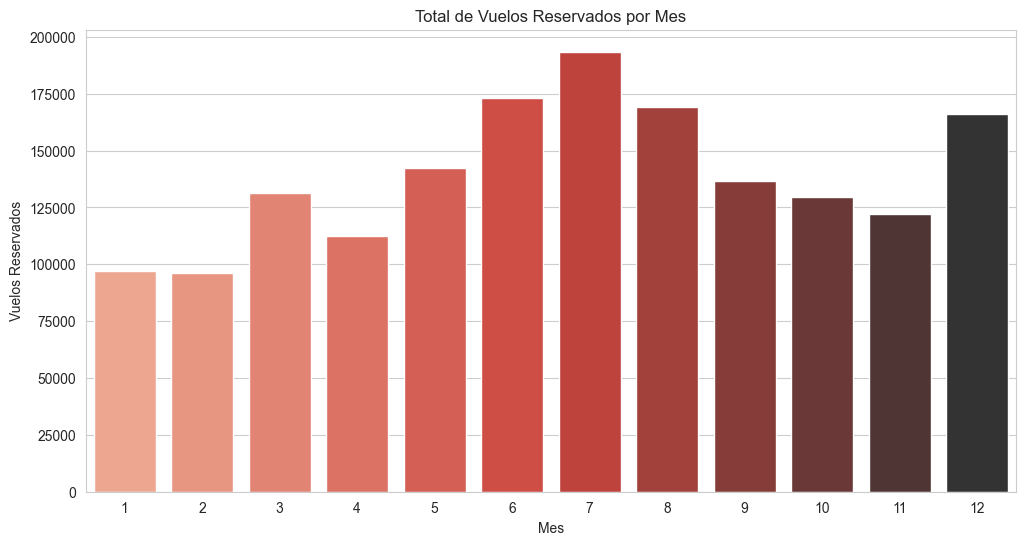

In [ ]:
plt.figure(figsize=(12, 6))

# Agrupamos los datos
vuelos_mes = df_merged.groupby('Month')['Flights Booked'].sum().reset_index()

sns.barplot(
    data=vuelos_mes, 
    x='Month', 
    y='Flights Booked', 
    hue='Month',        
    palette='Reds_d', 
    legend=False        
)

plt.title('Total de Vuelos Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')
plt.show()

Relacion distancia vs puntos acumulados

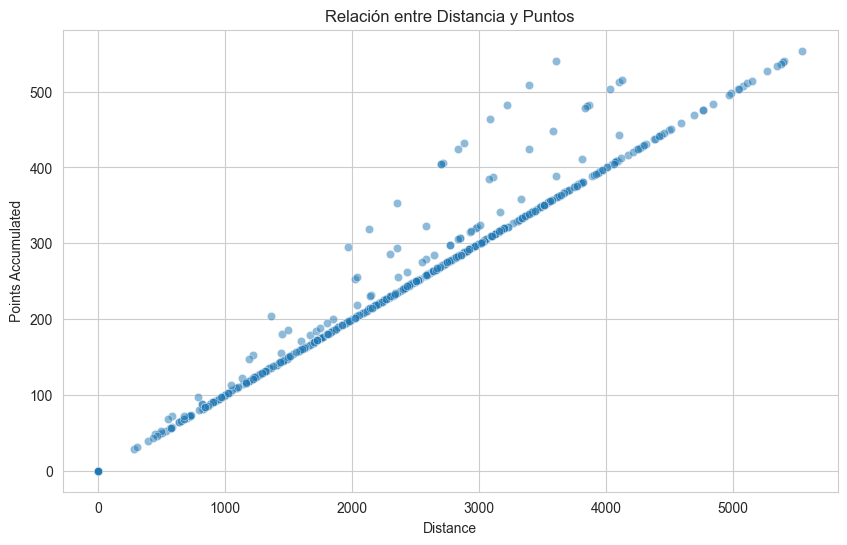

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged.sample(1000), x='Distance', y='Points Accumulated', alpha=0.5)
plt.title('Relación entre Distancia y Puntos')
plt.show()

distribucion de clientes por provincia

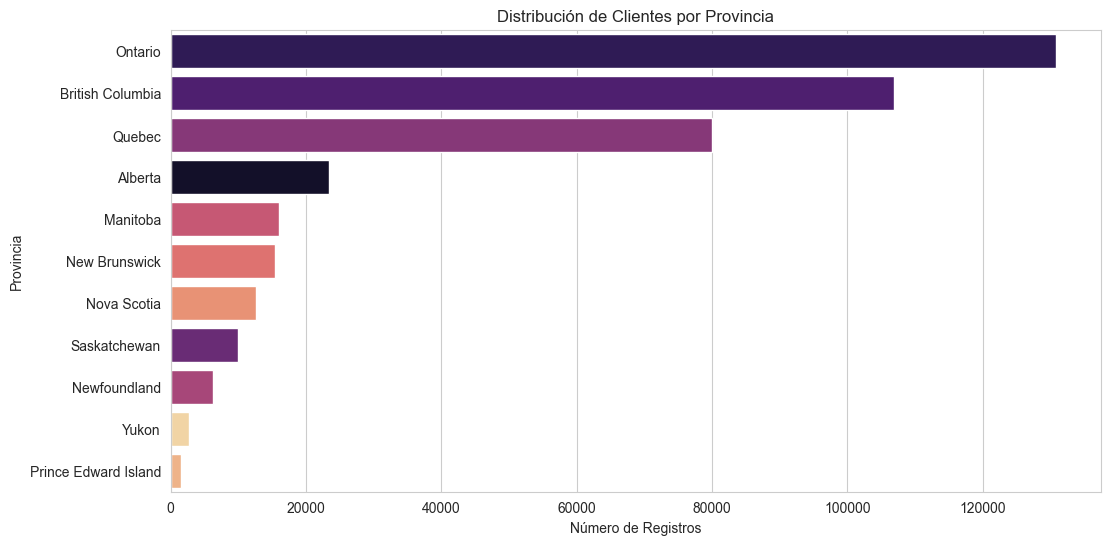

In [37]:
plt.figure(figsize=(12, 6))

# Obtenemos el orden de las provincias por conteo de registros
order = df_merged['Province'].value_counts().index

sns.countplot(
    data=df_merged, 
    y='Province', 
    order=order, 
    hue='Province',    
    palette='magma', 
    legend=False       
)

plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Número de Registros')
plt.ylabel('Provincia')
plt.show()

Comparacion de salario por nivel educativo

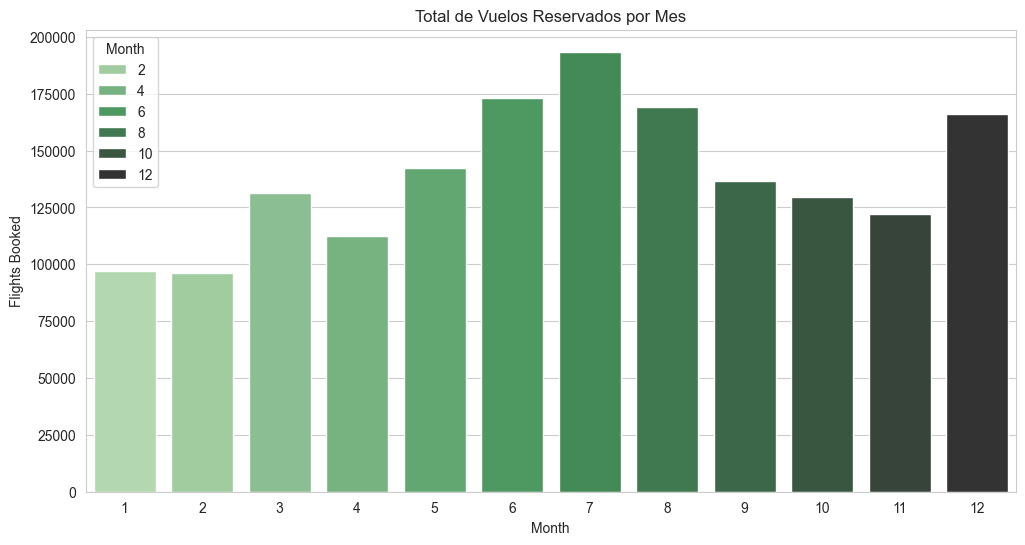

In [32]:
plt.figure(figsize=(12, 6))
vuelos_mes = df_merged.groupby('Month')['Flights Booked'].sum().reset_index()

sns.barplot(
    data=vuelos_mes, 
    x='Month', 
    y='Flights Booked', 
    hue='Month',      
    palette='Greens_d', 
    legend=True       
)

plt.title('Total de Vuelos Reservados por Mes')
plt.show()

Los niveles de "Doctor" y "Master" presentan los rangos salariales más altos. Sin embargo, hay un gran solapamiento entre "Bachelor" y "College", lo que indica que en estos niveles los ingresos pueden ser muy variados.

### 4. Evaluacion de diferencias de reservas

Analisis de vuelos por nivel educativo


In [24]:
# Preparación de datos
df_edu = df_merged[['Flights Booked', 'Education']]

In [23]:
# Estadísticos descriptivos
resumen_edu = df_edu.groupby('Education')['Flights Booked'].agg(['mean', 'std', 'median', 'count']).reset_index()
print(resumen_edu)

              Education      mean       std  median   count
0              Bachelor  4.091093  5.216995     1.0  253752
1               College  4.153012  5.242136     1.0  102672
2                Doctor  4.146281  5.250093     1.0   17856
3  High School or Below  4.155777  5.234551     1.0   19008
4                Master  4.184014  5.210294     1.0   12336


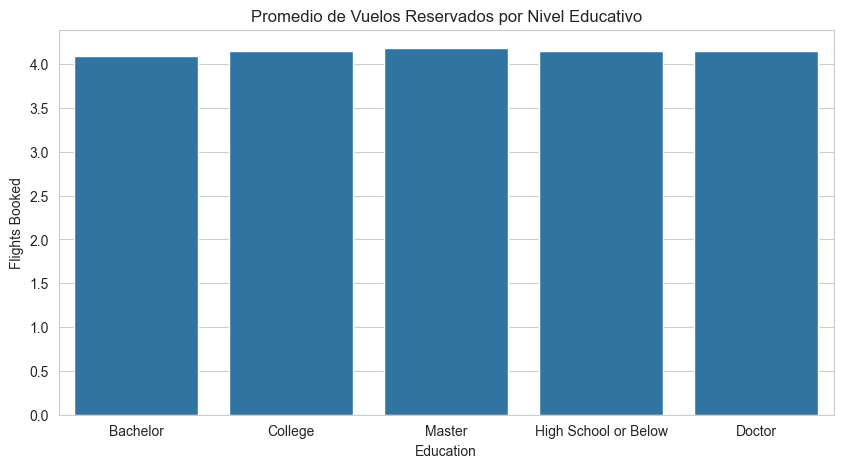

In [26]:
# Visualización para comparar
plt.figure(figsize=(10, 5))
sns.barplot(data=df_merged, x='Education', y='Flights Booked', errorbar=None)
plt.title('Promedio de Vuelos Reservados por Nivel Educativo')
plt.show()

Tras analizar el número de vuelos según la educación, vemos que el promedio de reservas es muy similar entre todos los grupos (oscilando cerca de los 4 vuelos por mes). Esto significa que, aunque el salario sí varía con la educación, la necesidad o hábito de volar no depende directamente de los títulos académicos del cliente. Para aumentar las reservas, el equipo de marketing no debería segmentar solo por estudios, sino quizás por el tipo de tarjeta o la antigüedad del cliente.